## Crow Search Algorithm

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import pandas as pd  
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.utils import resample  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from math import * 
import math 
import random 
import os 
%matplotlib inline
sns.set_style('darkgrid')

In [68]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
print("Dimension Diabetes est : ==> ",df.shape)

Dimension Diabetes est : ==>  (768, 9)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
corr_matrix = df.corr()
corr_matrix["Outcome"].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

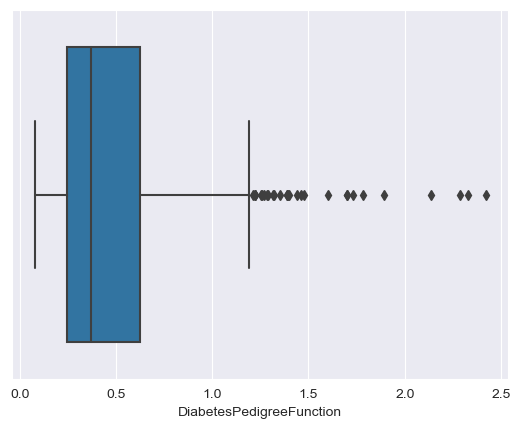

In [8]:
sns.boxplot(data=df, x="DiabetesPedigreeFunction")

<AxesSubplot:xlabel='Insulin'>

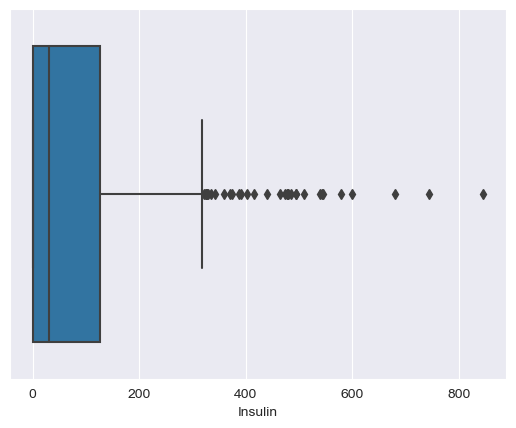

In [10]:
sns.boxplot(data=df, x="Insulin")

<AxesSubplot:xlabel='Glucose'>

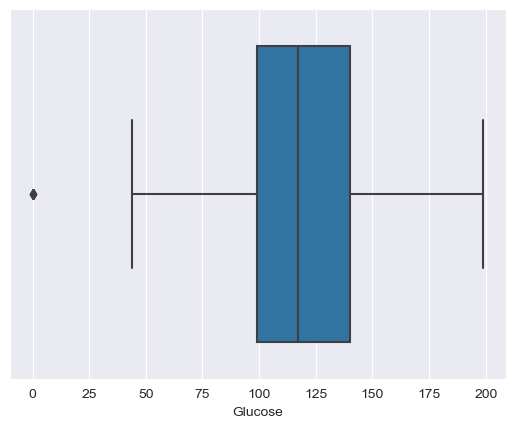

In [11]:
sns.boxplot(data=df, x="Glucose")

<AxesSubplot:xlabel='Pregnancies'>

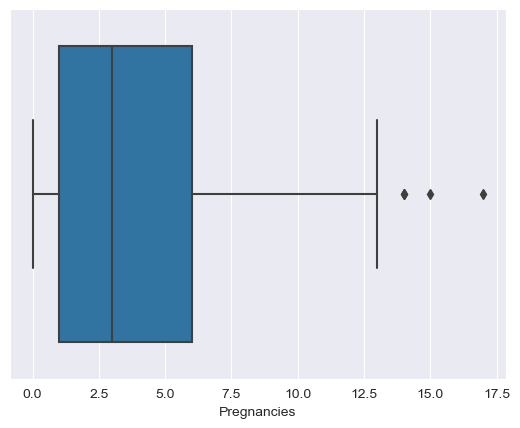

In [12]:
sns.boxplot(data=df, x="Pregnancies")

<AxesSubplot:xlabel='BloodPressure'>

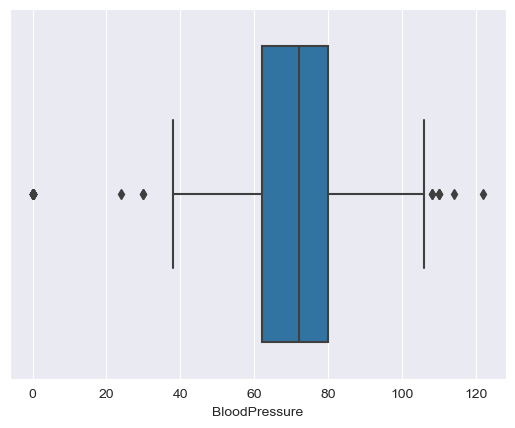

In [13]:
sns.boxplot(data=df, x="BloodPressure")

<AxesSubplot:xlabel='BMI'>

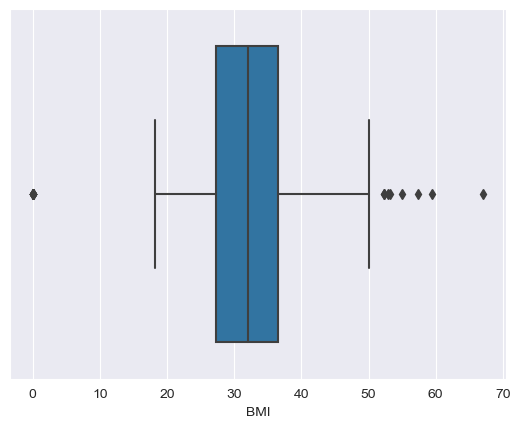

In [14]:
sns.boxplot(data=df, x="BMI")

In [15]:

for i in df[df['BloodPressure']==0]['BloodPressure'].index:
    df['BloodPressure'][i]=df['BloodPressure'].mean()
for i in df[df['SkinThickness']==0]['SkinThickness'].index:
    df['SkinThickness'][i]=df['SkinThickness'].mean()
for i in df[df['Insulin']==0]['Insulin'].index:
    df['Insulin'][i]=df['Insulin'].mean()
for i in df[df['BMI']==0]['BMI'].index:
    df['BMI'][i]=df['BMI'].mean()


In [16]:
df.iloc[7]

Pregnancies                  10.000000
Glucose                     115.000000
BloodPressure                69.105469
SkinThickness                20.589974
Insulin                      80.215914
BMI                          35.300000
DiabetesPedigreeFunction      0.134000
Age                          29.000000
Outcome                       0.000000
Name: 7, dtype: float64

<AxesSubplot:xlabel='SkinThickness'>

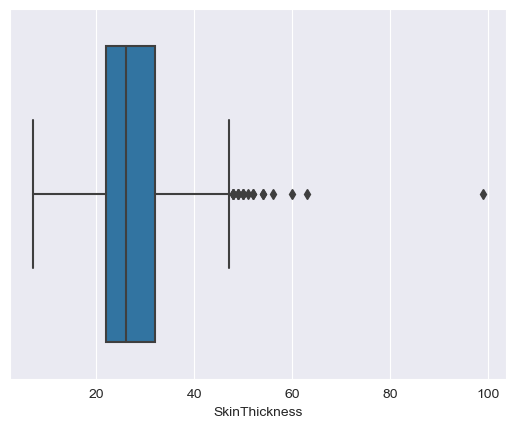

In [17]:
sns.boxplot(data=df, x="SkinThickness")

In [9]:
for i in df[df['Glucose']<2]['Glucose'].index:
    df['Glucose'][i]=df['Glucose'].mean()
df.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.683657,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.435978,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.130734       0.185127      -0.085222   
Glucose                      0.130734  1.000000       0.235191       0.060022   
BloodPressure                0.185127  0.235191       1.000000       0.126486   
SkinThickness               -0.085222  0.060022       0.126486       1.000000   
Insulin                     -0.126723  0.213206      -0.006771       0.541000   
BMI                          0.000132  0.231141       0.292870       0.443615   
DiabetesPedigreeFunction    -0.043242  0.091293       0.030046       0.180390   
Age                          0.607216  0.285045       0.350895      -0.066795   
Outcome                      0.198689  0.475776       0.142921       0.089728   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.126723  0.000132                 -0.043242   
Glucose                   0.213206  0.231

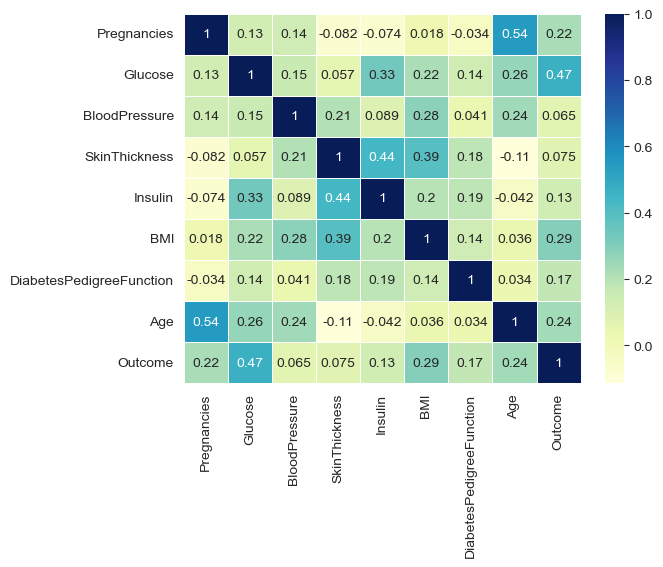

In [9]:
correlation = df.corr(method='pearson')
sns.heatmap(correlation, 
            xticklabels=correlation.columns,
            yticklabels=correlation.columns,
            cmap="YlGnBu",
            annot=True,
            linewidth=0.5)
spearman_correlation=df.corr(method='spearman')
print(spearman_correlation)
kendall_correlation=df.corr(method='kendall')
print(kendall_correlation)

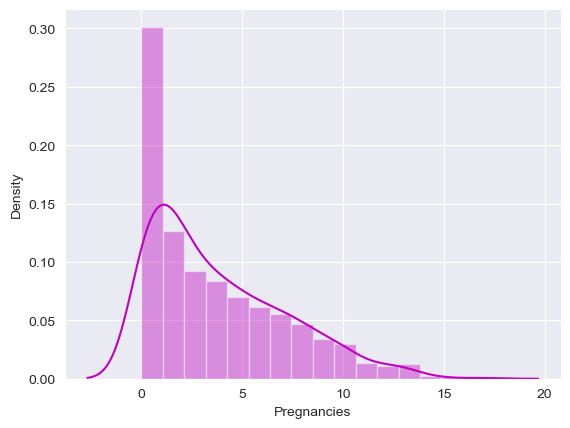

In [20]:
plot00=sns.distplot(df['Pregnancies'],color='m')

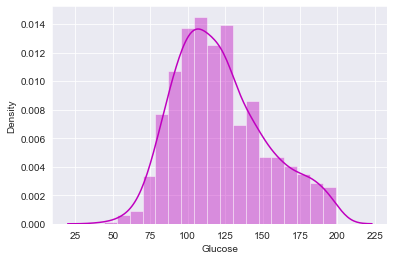

In [20]:
plot00=sns.distplot(df['Glucose'],color='m')

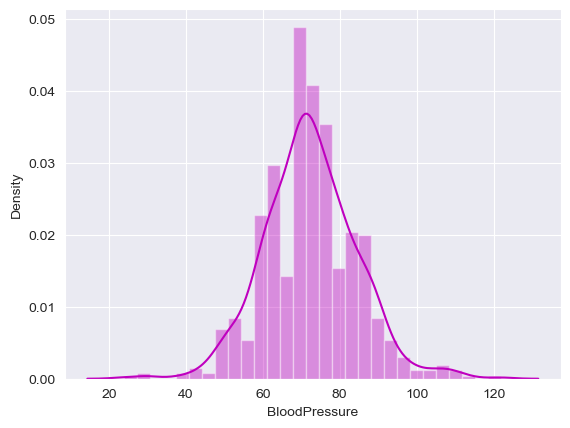

In [21]:
plot00=sns.distplot(df['BloodPressure'],color='m')

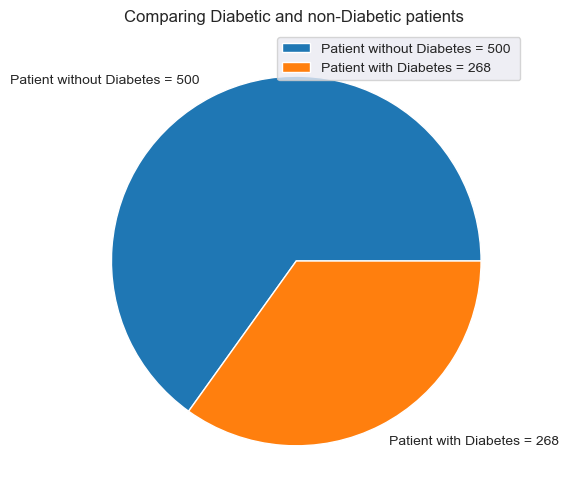

In [22]:
diabetes_count = np.array(df['Outcome'].value_counts(sort=True))
labels = ['Patient without Diabetes = 500 ', 'Patient with Diabetes = 268']
plt.figure(figsize=(8,6))
plt.pie(diabetes_count, labels=labels)
plt.legend()
plt.title('Comparing Diabetic and non-Diabetic patients ')
plt.show()

In [34]:
class_1=df[df['Outcome']==0]
class_2=df[df['Outcome']==1]

class_2_upsampled=resample(class_2,replace=True,n_samples=len(class_1),random_state=27)

upsampled=pd.concat([class_1,class_2_upsampled])
upsampled['Outcome'].value_counts()
data=upsampled


<AxesSubplot:xlabel='Outcome', ylabel='count'>

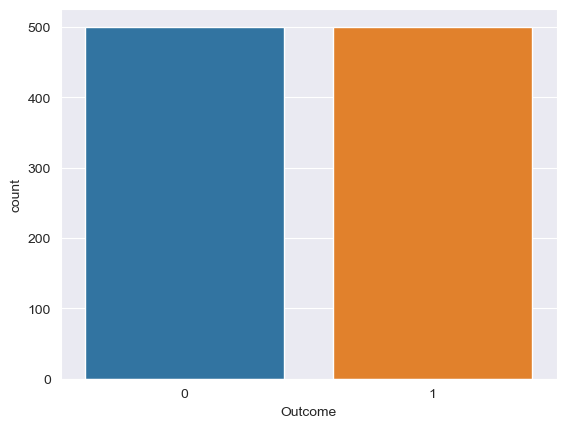

In [39]:
sns.countplot(data=data, x="Outcome")

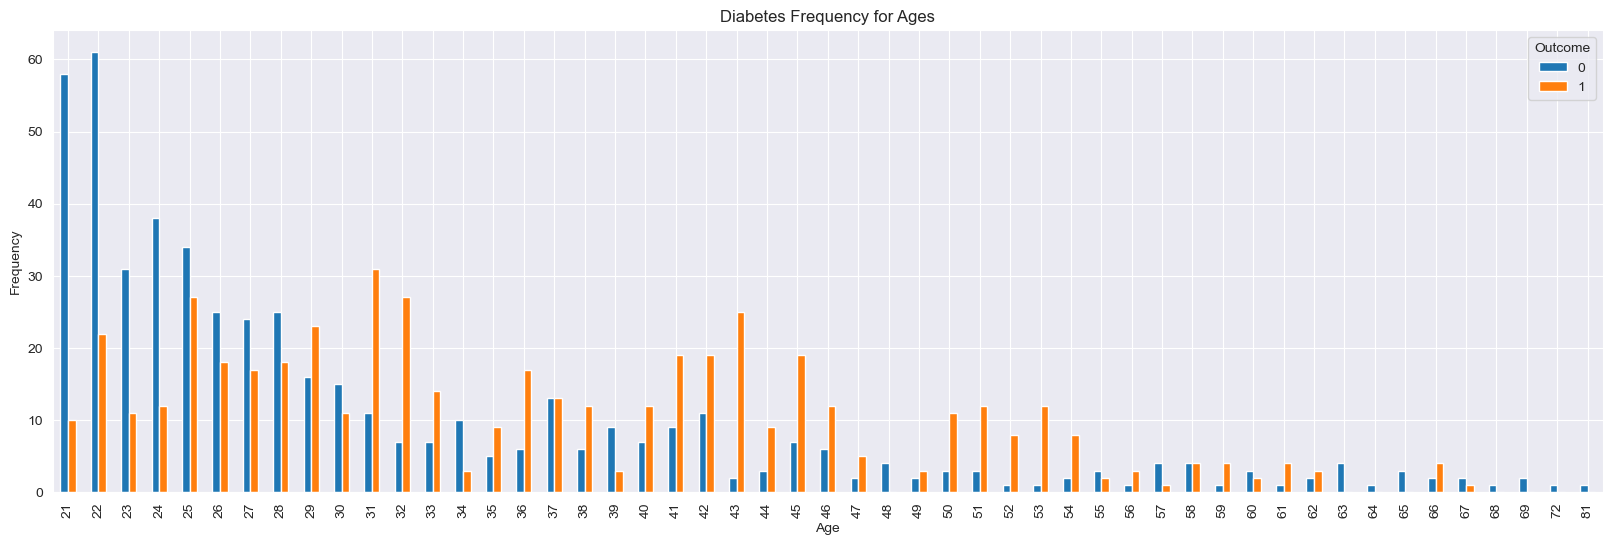

In [40]:

pd.crosstab(data.Age,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

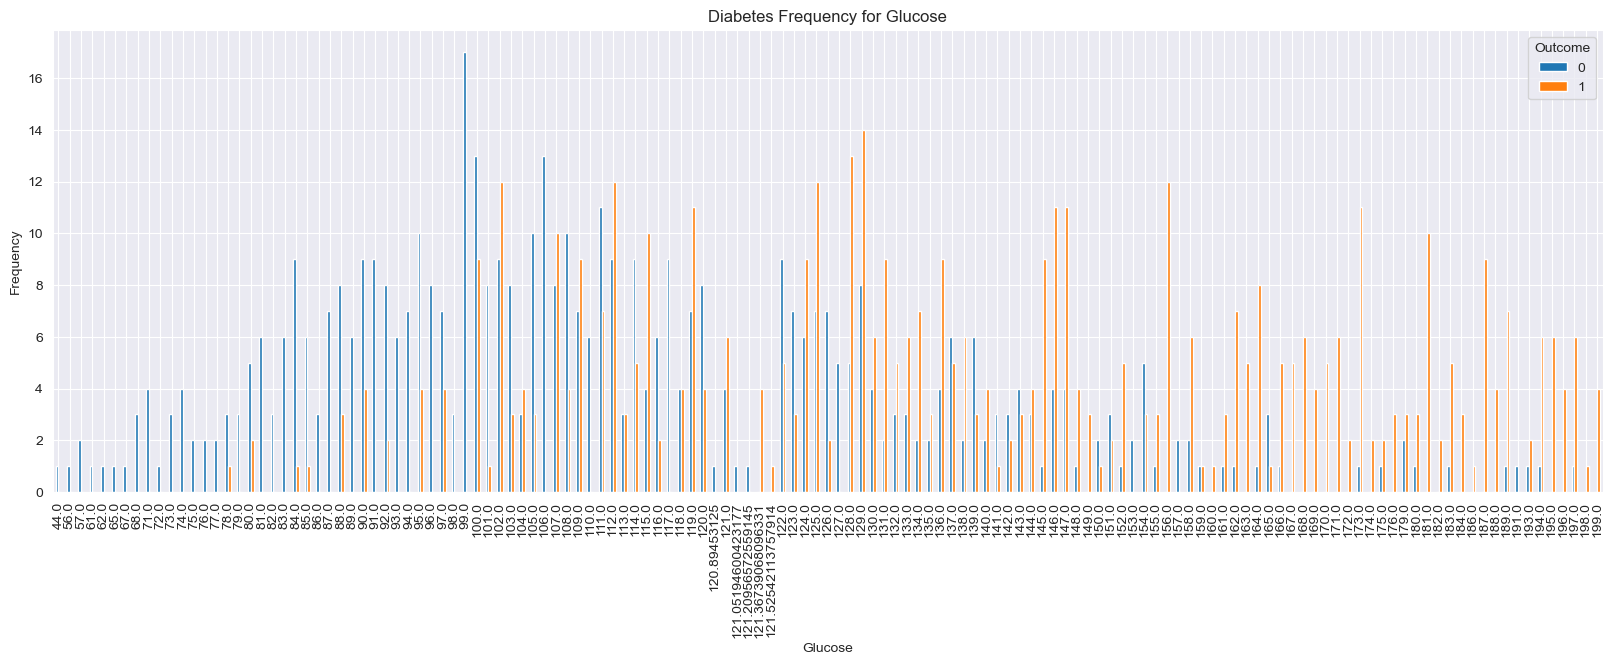

In [41]:
pd.crosstab(data.Glucose,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()

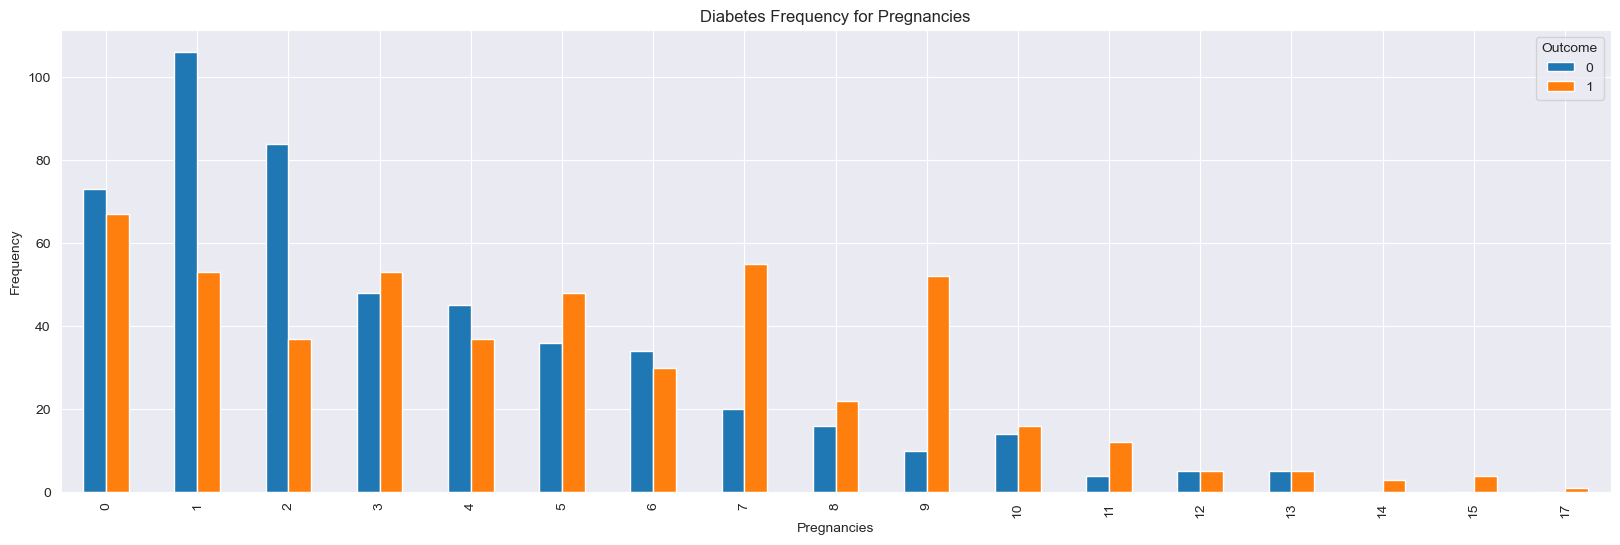

In [42]:
pd.crosstab(data.Pregnancies,data.Outcome).plot(kind="bar",figsize=(20,6))
plt.title('Diabetes Frequency for Pregnancies')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.show()

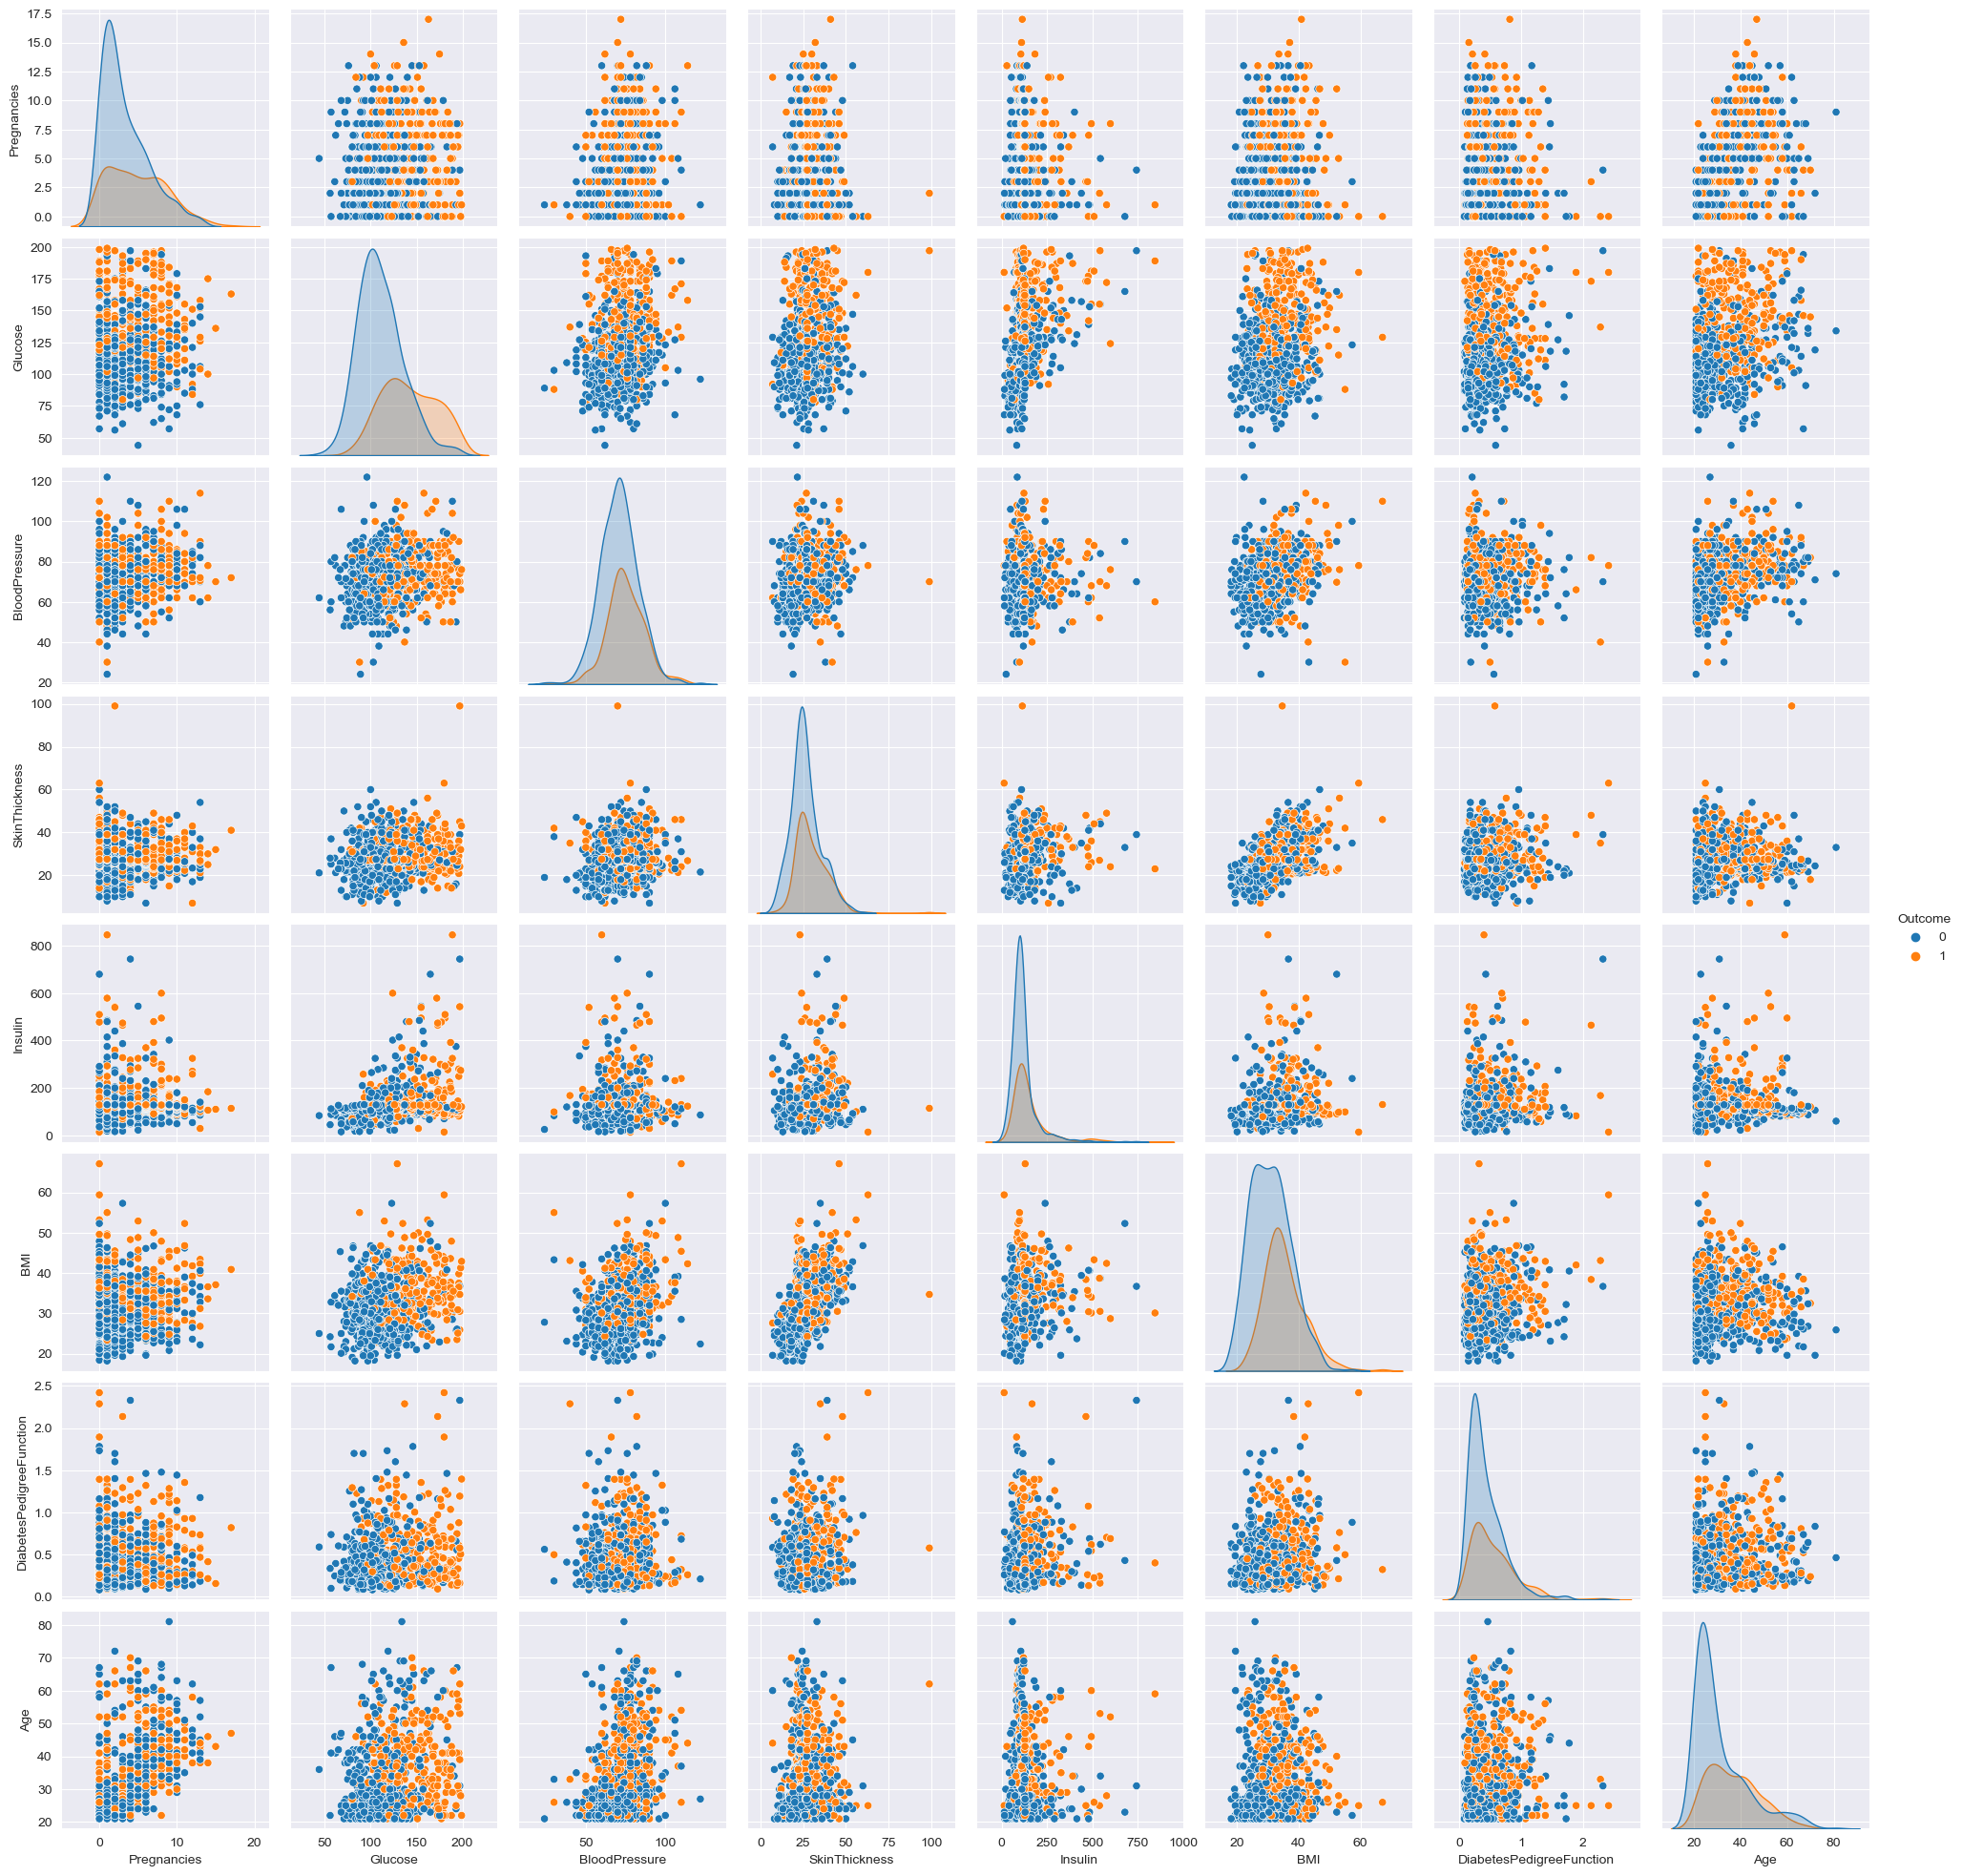

In [43]:
sns.pairplot(df, hue = 'Outcome')

In [70]:
scale = StandardScaler()

In [71]:

x = df.drop(['Outcome'], axis=1)
y = df['Outcome'].astype(float)
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

## KNN

In [76]:

classifier= KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

#Fit the model for the data

classifier.fit(x_train, y_train)

#Make the prediction
y_pred = classifier.predict(x_test)
accuracy_KNN_without = accuracy_score(y_test,y_pred)*100

In [77]:
accuracy_KNN_without

80.51948051948052

In [80]:
#CSA
def fitness(variables_values = []):
    classifier= KNeighborsClassifier(n_neighbors=math.ceil(variables_values[0]), p=math.ceil(variables_values[1]), metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [5,1], max_values = [120,3], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [81]:
resultat_KNN=crow_search_algorithm()
resultat_KNN

(array([14.62921579,  1.        , 82.46753247]),
 [array([50.05412531,  1.73438507, 79.87012987]),
  array([10.02788696,  1.69796133, 77.92207792]),
  array([57.33091617,  1.53091287, 79.22077922]),
  array([39.50901681,  1.8038798 , 77.27272727]),
  array([120.        ,   3.        ,  77.27272727]),
  array([33.71829557,  2.64334031, 79.87012987]),
  array([ 7.223408  ,  2.36185836, 76.62337662]),
  array([36.17908336,  2.84622723, 79.22077922]),
  array([54.65330956,  1.20561187, 79.22077922]),
  array([77.80633626,  1.91171951, 79.22077922]),
  array([41.03747242,  1.40912618, 79.22077922]),
  array([71.91466315,  3.        , 79.22077922]),
  array([31.43423197,  2.71452683, 79.22077922]),
  array([36.63826854,  1.        , 81.16883117]),
  array([62.80288482,  1.91562337, 81.16883117]),
  array([37.98947463,  2.59394491, 79.87012987]),
  array([100.04503041,   1.82496304,  78.57142857]),
  array([64.85311471,  1.        , 78.57142857]),
  array([47.47211634,  1.19701403, 79.2207792

In [82]:
resultat_KNN[0]#best position

array([14.62921579,  1.        , 82.46753247])

In [83]:
accuracy_KNN_withCSA=resultat_KNN[0][2]
accuracy_KNN_withCSA

82.46753246753246

In [19]:
ds=pd.DataFrame(data=resultat_KNN[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()
fig = px.scatter_3d(ds, x = 0, y = 1, z = 2)
fig.show()

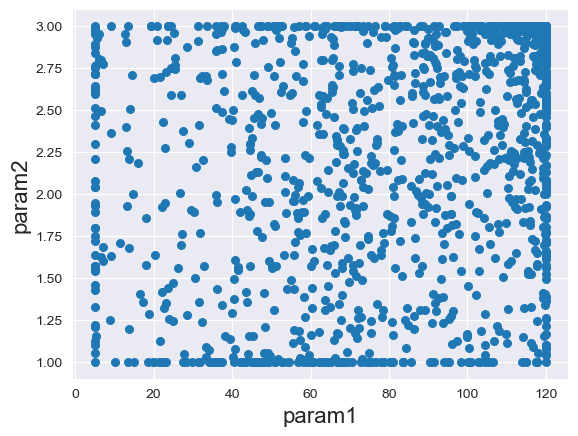

In [20]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## RandomForest

In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=10,n_estimators =5)
classifier.fit(x_train, y_train)
y_pred_RF_sans = classifier.predict(x_test)
accuracy_RF_without = accuracy_score(y_test,y_pred_RF_sans)*100
print("accuracy=",accuracy_RF_without)
print("recall=",recall_score(y_test,y_pred))


accuracy= 75.97402597402598
recall= 0.6382978723404256


In [85]:
#csa
def fitness(variables_values = [3,8]):
    classifier = RandomForestClassifier(max_depth=math.ceil(variables_values[0]),n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [86]:
resultat_RF=crow_search_algorithm()
resultat_RF

(array([29.02633552,  6.        , 87.01298701]),
 [array([72.62944297,  5.15476859, 72.07792208]),
  array([76.96167471,  4.29391514, 77.27272727]),
  array([52.41427644,  7.77142481, 83.76623377]),
  array([28.96075247,  4.61468408, 75.32467532]),
  array([75.70040025,  8.1670464 , 73.37662338]),
  array([ 2.        ,  6.75933798, 73.37662338]),
  array([91.41951041,  6.96974099, 74.02597403]),
  array([17.40522646,  8.58544674, 77.27272727]),
  array([86.89751625,  8.76864542, 76.62337662]),
  array([ 2.        ,  6.58613366, 78.57142857]),
  array([54.30959409,  5.91046675, 74.02597403]),
  array([53.9967438 ,  5.08286971, 77.27272727]),
  array([54.35293231,  5.25778538, 72.72727273]),
  array([72.40493795,  7.64390602, 77.92207792]),
  array([54.31742184,  4.73183562, 75.97402597]),
  array([93.32609949,  2.        , 70.77922078]),
  array([65.74523469,  2.        , 75.97402597]),
  array([100.        ,   8.45012601,  73.37662338]),
  array([ 2.04488375,  5.61617618, 76.62337662])

In [39]:
#best position
resultat_RF[0]

array([72.35962137, 10.        , 84.41558442])

In [44]:
accuracy_RF_withCSA=resultat_RF[0][2]
accuracy_RF_withCSA

84.4155844155844

In [26]:
ds=pd.DataFrame(data=resultat_RF[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()

  
fig = px.scatter_3d(ds, x = 0, 
                    y = 1, z = 2)
  
fig.show()

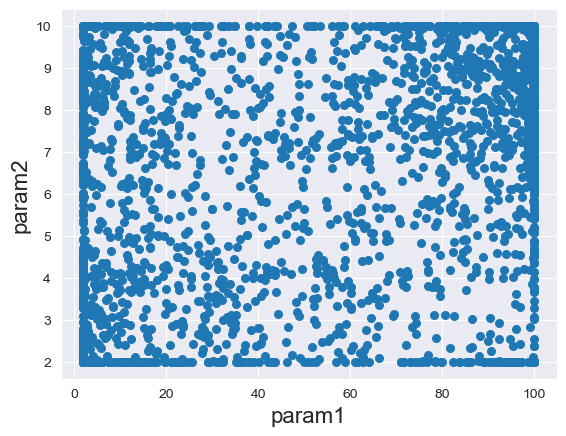

In [27]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## Logistic Regression

In [57]:
x = df.drop(['Outcome'], axis=1)
y = df['Outcome'].astype(float)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [59]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
accuracy_RL_without = accuracy_score(y_test,y_pred)*100
accuracy_RL_without

82.46753246753246

In [60]:
#CSA
def fitness(variables_values = [1.0,0]):
    classifier = LogisticRegression(C=variables_values[0],random_state=ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 5, min_values = [0.1,0], max_values = [1000.0,100], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [0.1,0], max_values = [1000.0,100], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 30, ap = 0.7, fL =5, min_values = [0.1,0], max_values = [1000.0,100], iterations = 20, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [61]:
resultat_RL=crow_search_algorithm()
resultat_RL

(array([355.06770231,  17.        ,  83.76623377]),
 [array([ 0.1       , 29.33482761, 81.81818182]),
  array([64.38697304, 78.27569829, 81.81818182]),
  array([295.48939952,  14.51594163,  81.16883117]),
  array([804.78229497,  15.25392423,  81.81818182]),
  array([210.56951889,   7.86554229,  81.81818182]),
  array([760.67405504,  40.61922802,  83.11688312]),
  array([443.21213876,  94.24300598,  81.16883117]),
  array([854.68478824,   4.33852903,  81.81818182]),
  array([1000.        ,    0.        ,   82.46753247]),
  array([ 8.69989578, 64.62662677, 81.16883117]),
  array([958.79587601,  97.60193447,  81.81818182]),
  array([276.02106768,  20.40171116,  81.81818182]),
  array([ 0.1       , 37.73823095, 81.81818182]),
  array([912.85534425,  57.30066653,  81.81818182]),
  array([730.19561098,  31.68772339,  83.11688312]),
  array([866.31350909,  48.60906304,  81.81818182]),
  array([281.95369346,  24.94956257,  83.11688312]),
  array([663.98241921,  83.5440729 ,  80.51948052]),
  a

In [62]:
resultat_RL[0]

array([355.06770231,  17.        ,  83.76623377])

In [65]:
accuracy_RL_withCSA=resultat_RL[0][2]
accuracy_RL_withCSA

83.76623376623377

In [34]:
ds=pd.DataFrame(data=resultat_RL[1])
ds=ds.sort_values(by=[0,1])
ds=ds.drop_duplicates()
fig = px.scatter_3d(ds, x = 0,y = 1, z = 2)
fig.show()

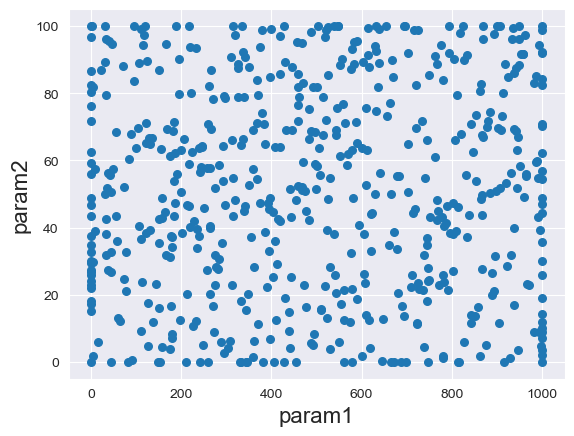

In [35]:
plt.scatter(ds[0], ds[1],s=30)
plt.xlabel('param1', fontsize=16)
plt.ylabel('param2', fontsize=16)
plt.show()

## Evaluation 


In [66]:
y1 = [accuracy_KNN_without, accuracy_RF_without, accuracy_RL_without] 
y2 = [accuracy_KNN_withCSA, accuracy_RF_withCSA, accuracy_RL_withCSA]

<AxesSubplot:xlabel='0', ylabel='1'>

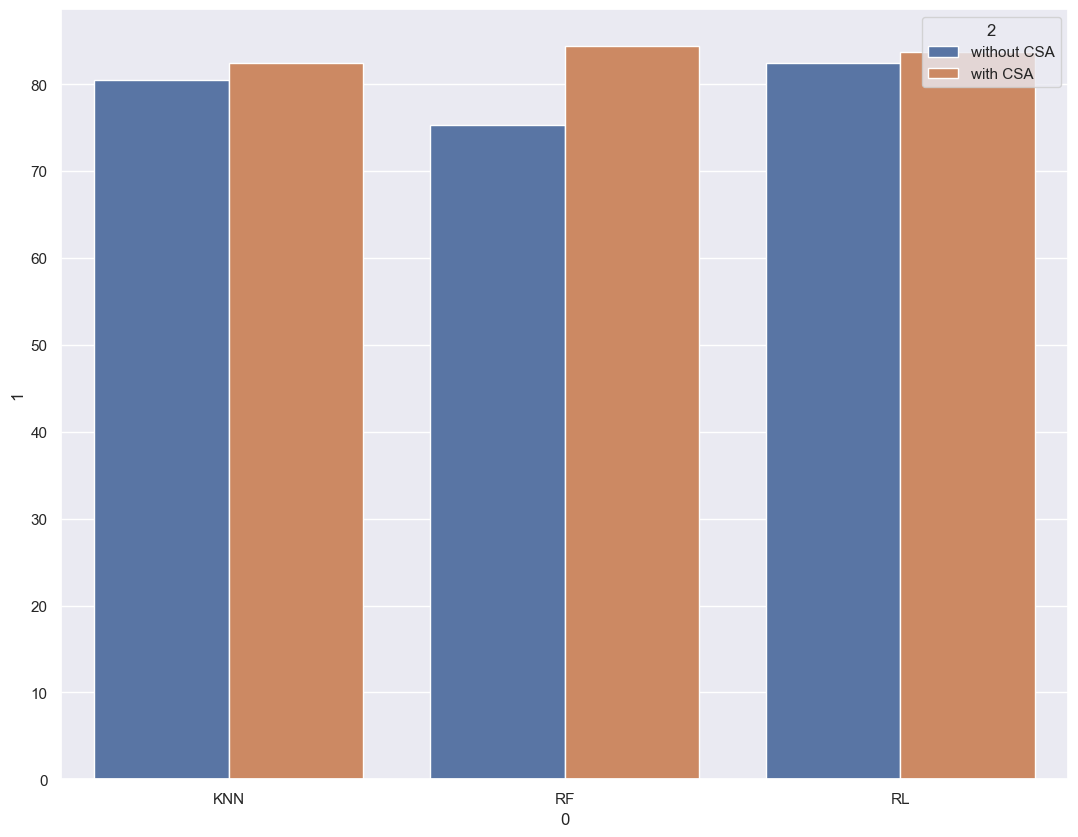

In [67]:
ds=[['KNN',y1[0],'without CSA'],['KNN',y2[0],'with CSA'],['RF',y1[1],'without CSA'],['RF',y2[1],'with CSA'],['RL',y1[2],'without CSA'],['RL',y2[2],'with CSA']]
ds=pd.DataFrame(ds)
sns.set(rc={'figure.figsize':(13,10)})
sns.barplot(data=ds, x=0, y=1, hue=2)